In [1]:
from utilities import *

I am in libs


In [2]:
#getting the stoeddataset and targets from analysis
%store -r x_scaled
%store -r Y

In [32]:
#converting your dataframe to a dictionnary of patients
#just replace x_scaled by your dataset
data = {"Patient "+str(index): row for index, row in x_scaled.iterrows()}

In [33]:
data

{'Patient 0': Age                                                             -0.416667
 Sexe (0=F, 1=M)                                                 -1.000000
 BMI (body mass index)                                            0.285714
 BMI< ou egal 18                                                  0.000000
 BMI>30                                                           0.000000
 BMI>25                                                           1.000000
 cardiopathie ischémique                                          0.000000
 diabètepré-opératoire                                            1.000000
 étiologie BPCO                                                   0.000000
 étiologie Fibrose                                                1.000000
 ECMO pré-opératoire                                              1.000000
 type de TP (0=monopulmonaire, 1=bipulmonaire)                    0.000000
 ECMO peropératoire                                               0.000000
 SOFA J0    

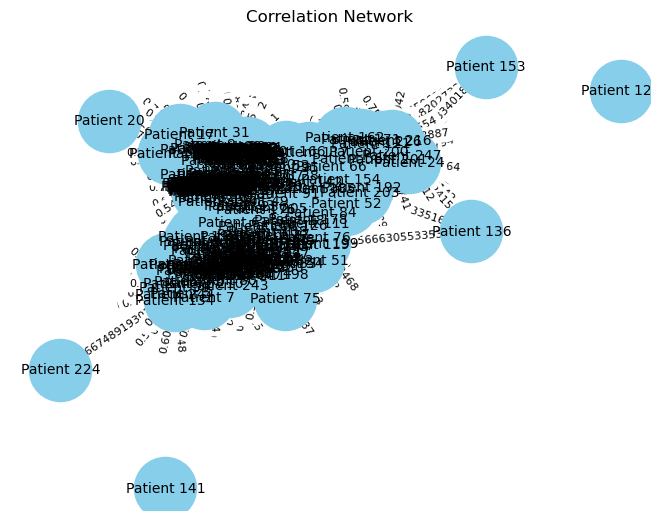

In [34]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
#data =patient_dict

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a network graph
G = nx.Graph()

# Add nodes (variables) to the graph
for column in df.columns:
   G.add_node(column)

# Add edges (connections) between nodes based on correlation
for i, node1 in enumerate(df.columns):
   for j, node2 in enumerate(df.columns):
       if i < j:  # To avoid adding duplicate edges
           correlation = correlation_matrix.iloc[i, j]
           if abs(correlation) > 0.5:  # Set a threshold for correlation strength
               G.add_edge(node1, node2, weight=correlation)

# Draw the network
pos = nx.spring_layout(G, seed=42)  # Layout the nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True, font_size=10, node_color='skyblue', node_size=2000,
       edge_color=[d['weight'] for u, v, d in G.edges(data=True)], cmap=plt.cm.coolwarm)

# Add edge weights as labels
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Show the plot
plt.title("Correlation Network")
plt.axis('off')
plt.show()

In [26]:
import networkx as nx
import plotly.graph_objects as go

# Create a large random graph
#G = nx.gnm_random_graph(1000, 3000)

# Calculate a layout for our nodes
pos = nx.spring_layout(G)

# Create Plotly figure
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edges_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = [pos[node][0] for node in G.nodes()]
node_y = [pos[node][1] for node in G.nodes()]

nodes_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='YlGnBu',
        size=10,
    )
)

# Create the Plotly figure
fig = go.Figure(data=[edges_trace, nodes_trace],
                layout=go.Layout(
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=0),
                ))

# Show the Plotly figure
fig.show()


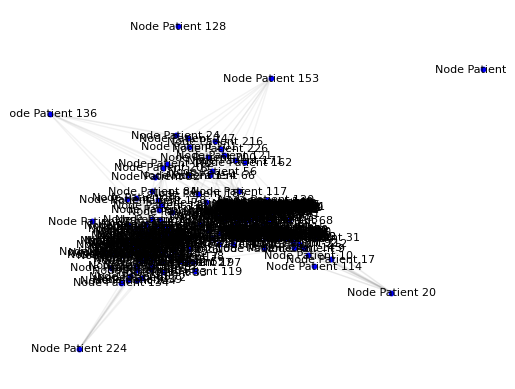

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a large random graph
#G = nx.gnm_random_graph(1000, 3000)

# Calculate a layout for our nodes
pos = nx.spring_layout(G)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='blue')
nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color='gray')

# Add labels to nodes
labels = {node: f'Node {node}' for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8)

# Set plot options
plt.gca().set_axis_off()

# Show the plot
plt.show()
